# <img style="float: left; padding-right: 20px; height: 70px" src="https://i.imgur.com/cMzxwTN.jpg"> Fundamentos de Machine Learning
## Sesion 2, Actividad I
**Universidad Privada Boliviana**<br/>
**Diplomado en Machine Learning y Ciencia de Datos**<br/>



<hr>


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline


## 3. Optimizacion del grado del polinomio. 

### 3.1 Leer el dataset

In [2]:
# Leer el archivo "dataset1.csv" como  Pandas dataframe
df = pd.read_csv('dataset1.csv')

# Eche un vistazo rápido al conjunto de datos

df


,x1,y1
0,0.265960,1.624972
1,0.516805,2.734012
2,0.658542,4.628908
3,1.678052,5.186455
4,2.112463,8.395088
5,2.757320,8.654015
6,3.200844,13.373424
7,3.815254,12.029562
8,4.174084,14.982755
9,5.005190,13.476361


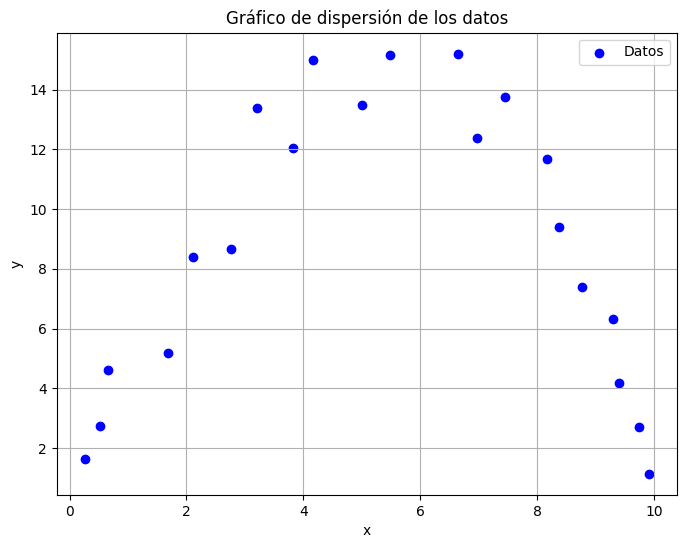

In [3]:
## Graficar los datos
plt.figure(figsize=(8, 6))
plt.scatter(df['x1'], df['y1'], color='blue', label='Datos')
plt.title('Gráfico de dispersión de los datos')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

### ⏸ Según el gráfico anterior, ¿podria indicar el grado optimo del polinomio para una regresion lineal polinomial?

Respuesta: `Con una de Grado 2`

### 3.2 Obtener las variables de entrada y salida

In [4]:
# Asigne los valores de las columnas x e y a la
# variables predictoras y de respuesta

# Variable de predictora
# Estos es lista de listas
x=df[['x1']].values
# Variable de respuesta
# Estos es una lista 
y=df['y1'].values



### 3.3 Train-validation split

Dividir los datos de entrada en `Train/Validation` sets

In [5]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y validación con un conjunto de entrenamiento del 75 %
# Establecer estado_aleatorio=1
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=1)
# Esto es plantar la semilla

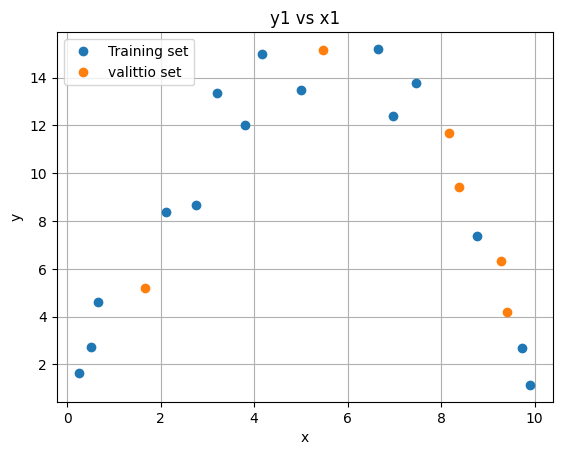

In [6]:
# graficar los sets de train y validacion

plt.plot(x_train, y_train,'o', label='Training set')
plt.plot(x_val, y_val,'o', label='valittio set')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y1 vs x1')

plt.legend()
plt.grid(True)
plt.show()

Cambiar el estado aleatorio y anotar sus observaciones respecto a la eleccion de los  datos en cada set.

### 3.4 Cálculo del train & validation error en términos de MSE

In [7]:
# Completar el siguiente codigo

# Seleccionar el grado maximo a iterar
maxdeg = 15
training_error = []
validation_error = []

for d in range(maxdeg):
    # calculo de los polynomial features
    x_poly_train = PolynomialFeatures(degree=d).fit_transform(x_train)
    x_poly_val   = PolynomialFeatures(degree=d).fit_transform(x_val)
    # Inicializar el modelo de regresion sin utilizar el intercept
    lreg = LinearRegression(fit_intercept=False)

    # Ajustar el modelo en los datos de entrenamiento
    lreg.fit(x_poly_train, y_train)
    print(lreg.coef_)
    # Utilizar el modelo entrenado para predecir en los datos transformados del train set
    y_train_pred = lreg.predict(x_poly_train)
    
    # Utilizar el modelo entrenado para predecir en los datos transformados del validation set
    y_val_pred   = lreg.predict(x_poly_val)

    # Calcular el error en base a los datos en y_train_pred y y_val_pred
    error_train = mean_squared_error(y_train, y_train_pred)
    error_val   = mean_squared_error(y_val_pred,y_val)
    # adicionar los errores calculados a la lista de training_error y validation_error
    training_error.append(error_train)
    validation_error.append(error_val)



    

[8.83202917]
[8.1511312  0.14186153]
[-0.2227622   5.69334609 -0.54991252]
[ 1.1016222   3.74880004 -0.04211672 -0.03378589]
[ 1.13688493e+00  3.66239180e+00 -2.37851167e-03 -3.98948060e-02
  2.98245429e-04]
[ 7.15819244e-01  4.93643925e+00 -8.49285391e-01  1.78480322e-01
 -2.37238731e-02  9.43996703e-04]
[ 2.38817180e-01  6.62267089e+00 -2.36805721e+00  7.47938102e-01
 -1.25682474e-01  9.59899545e-03 -2.80017354e-04]
[-1.61854169e+00  1.48664862e+01 -1.32697167e+01  6.88498396e+00
 -1.84732575e+00  2.62197106e-01 -1.88049602e-02  5.35511460e-04]
[-3.07164335e+00  2.28848437e+01 -2.72024239e+01  1.71356260e+01
 -5.70280448e+00  1.06673603e+00 -1.13036666e-01  6.33120737e-03
 -1.45614372e-04]
[ 4.40720764e-03  3.08221051e+00  1.36729712e+01 -1.92196301e+01
  1.12913028e+01 -3.52104448e+00  6.27435365e-01 -6.41520143e-02
  3.50257742e-03 -7.91602940e-05]
[ 5.83222876e+00 -3.70751421e+01  1.04779358e+02 -1.11995390e+02
  6.26943320e+01 -2.05843955e+01  4.17438628e+00 -5.29554599e-01
  4.0

### 3.5 Encontrar el modelo optimo

In [8]:
###
print(training_error)

[24.90581668621805, 24.700761882334966, 1.6265096930295693, 1.0801549178123129, 1.0800018672150822, 1.07050088422034, 1.0652389532839306, 0.9738815553945189, 0.9274232718381935, 0.8638252088943289, 0.8163349567051436, 0.7408802179076442, 0.6004941706148882, 0.5658493322545615, 0.5997810843524167]


### 3.6 Graficar el error vs grado del polinomio

In [9]:
print(validation_error)

[14.961572884232114, 15.467395037783389, 2.250715205970138, 1.1304824846656538, 1.123530916805718, 1.351126010504503, 1.3532575981865105, 1.4821028941013923, 0.9979661095976115, 1.6762824502747904, 3.0062773294081055, 4.581361740353905, 43.56456806201593, 174.30722502014632, 417.9034789272794]


In [10]:
error_min_val=min(validation_error)
print("El error min ", error_min_val)

El error min  0.9979661095976115


⏸  Si ejecutas el ejercicio con un estado aleatorio de 0, ¿notas algún cambio? ¿A qué atribuirías este cambio?"""

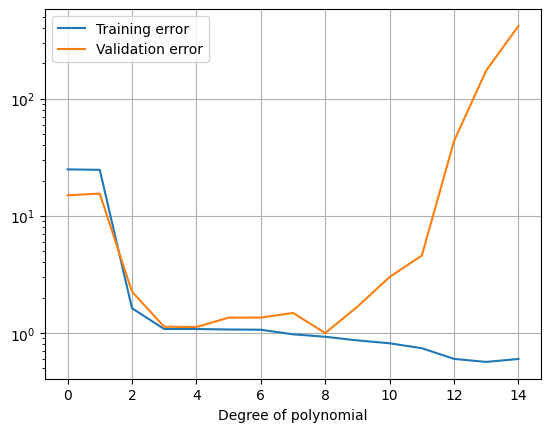

In [ ]:

grado_polin=list(range(maxdeg))
plt.semilogy(grado_polin,training_error, label='Training error')
plt.semilogy(grado_polin,validation_error, label='Validation error')
plt.xlabel('Degree of polynomial')
plt.grid(True)
plt.legend()
plt.show()